In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fmin
import scipy.stats as sc

# Projet Physio 

## 1. Introduction

Dans ce projet, l’objectif est d’étudier la régulation de la glycémie (le taux de glucose
dans le sang) lors d’une prise orale de glucose. Après une prise orale, le glucose est
absorbé par l’intestin pour ensuite passer dans le sang. De ce fait, comparée aux modèles
développés dans le TD précédent il faut rajouter un compartiment qui est celui de l’intestin. La plupart du temps ce compartiment est relativement facile à modéliser mais pas
lorsqu’on s’intéresse à des maladies métaboliques impliquant l’intestin. Le test oral de
tolérance au glucose est un test classique effectué pour tester la tolérance de l’organisme
au glucose et donc de détecter des diabètes.


## 2. Calibration 

##### 1) 

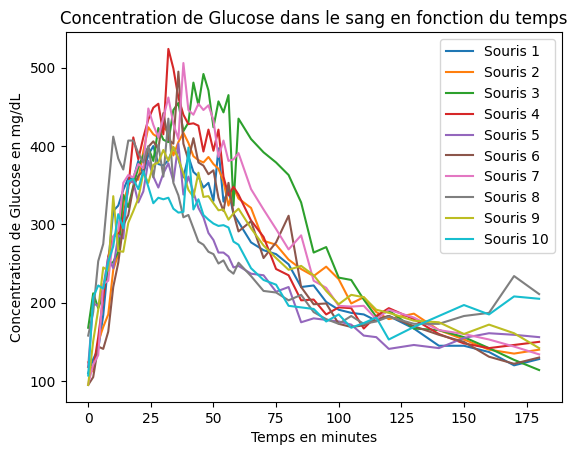

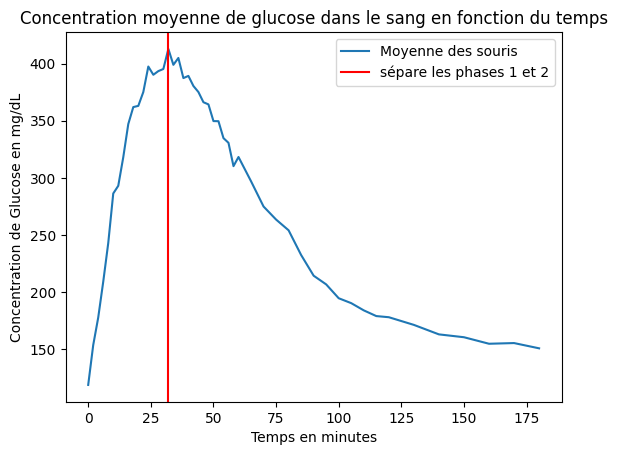

In [11]:
data = np.loadtxt('full_ogtt.txt')
t = data[:,0]
G0 = 4500
Moyenne = data[:,11]

plt.title("Concentration de Glucose dans le sang en fonction du temps")
plt.xlabel("Temps en minutes")
plt.ylabel("Concentration de Glucose en mg/dL")
for k in range(1,len(data[0])-1):
    plt.plot(t, data[:,k], label="Souris "+str(k))
    plt.legend(loc="upper right")
plt.show()

plt.title("Concentration moyenne de glucose dans le sang en fonction du temps")
plt.xlabel("Temps en minutes")
plt.ylabel("Concentration de Glucose en mg/dL")
plt.plot(t, Moyenne, label='Moyenne des souris')
plt.axvline(x=32.0, color='red', label='sépare les phases 1 et 2')
plt.legend(loc="upper right")
plt.show()

 On observe que la concentration moyenne de glucose dans le sang augmente entre 0 et 32 minutes. Cela correspond à la phase d'absorption du glucose par l'intestin et passage dans le sang. Ensuite, après 32 minutes cette même concentration diminue lentement. On suppose que cela est dû à l'effet de l'insuline.

##### 2) 

On note a le coefficient associé au transfert du glucose de l'intestin vers le sang.  
Ainsi,

dGi/dt = -r  x  Gi

##### 3) 

Dans les TD précédents on a utilisé les EDO suivantes:  
  
  
dGdt = -a x I x G  
dIdt = d x G - e x I

##### 4) 

On obtient donc le système d'équations différentielles suivant :  
  
dGi/dt = -aGi  
dGs/dt = aGi - bI x Gs  
dI/dt = cGs - dI

On a donc les paramètres a b c d e f ce qui fait 5 paramètres. 
Gb n'est pas un paramètre libre, on le fixe une fois puis il ne varie pas.

a = vitesse de transfert de Gi  
b = sensibilité de Gs à l'insuline   
c = stockage de Gc quand il excède le seuil Gb  
d = induction de l'insuline par Gs  
e = effet autorégulant de l'insuline

##### 5) 

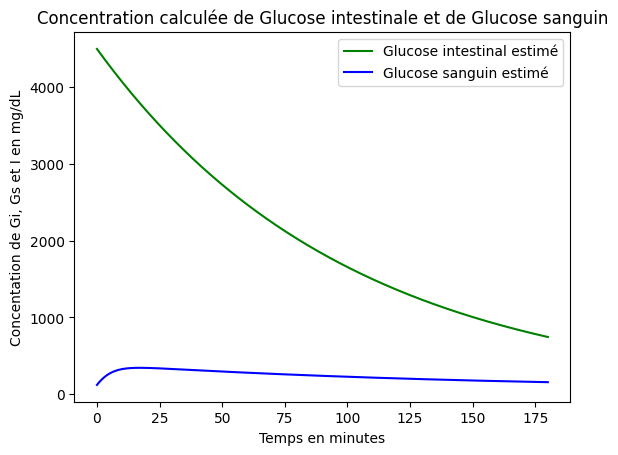

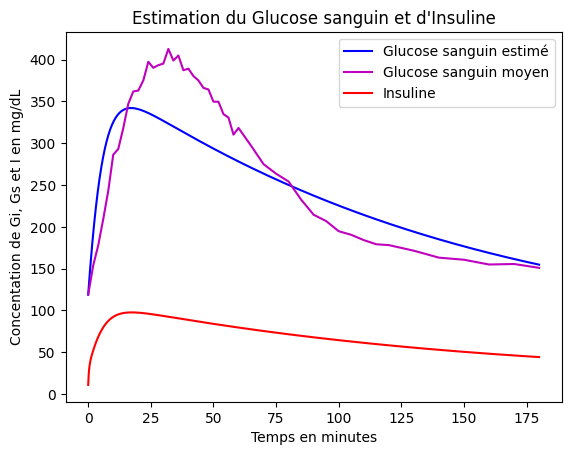

In [12]:
def model(GiGsI, t, a, b, c, d, e):
    Gi, Gs, I = GiGsI
    Gb = 100
    dGidt = -a*Gi
    dGsdt = a*Gi - b*I*Gs -c*max(0, Gs - Gb)
    dIdt = d*Gs - e*I
    return [dGidt, dGsdt, dIdt]
    
t2 = np.linspace(0,180,1000)
y0 = [4500, 119, 11]
a = 1e-2
b = 7e-4
c = 6e-2
d = 1
e = 3.5

GiGsI = odeint(model, y0, t2, args=(a, b, c, d, e))
Gi_calc = GiGsI[:,0]
Gs_calc = GiGsI[:,1]
I_calc = GiGsI[:,2]

plt.title("Concentration calculée de Glucose intestinale et de Glucose sanguin")
plt.xlabel("Temps en minutes")
plt.ylabel("Concentation de Gi, Gs et I en mg/dL")
plt.plot(t2, Gi_calc, "g", label="Glucose intestinal estimé")
plt.plot(t2, Gs_calc, "b", label="Glucose sanguin estimé")
plt.legend(loc="upper right")
plt.show()

plt.title("Estimation du Glucose sanguin et d'Insuline")

plt.xlabel("Temps en minutes")
plt.ylabel("Concentation de Gi, Gs et I en mg/dL")
plt.plot(t2, Gs_calc, "b", label="Glucose sanguin estimé")
plt.plot(t, Moyenne, "m", label="Glucose sanguin moyen")
plt.plot(t2, I_calc, "r", label="Insuline")
plt.legend(loc="upper right")
plt.show()

#####  6)

C:\Users\Ihsân-san\AppData\Local\Temp\ipykernel_7624\3225571332.py:13: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  param = fmin(distance, param, args=(y0, t, obs))


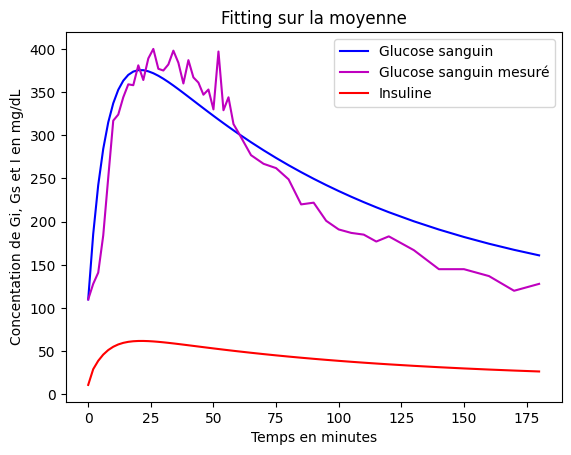

[9.97237968e-03 2.80386594e-10 1.32182265e-01 6.62642436e-01
 4.01897317e+00]
Figure : Souris n° 1 



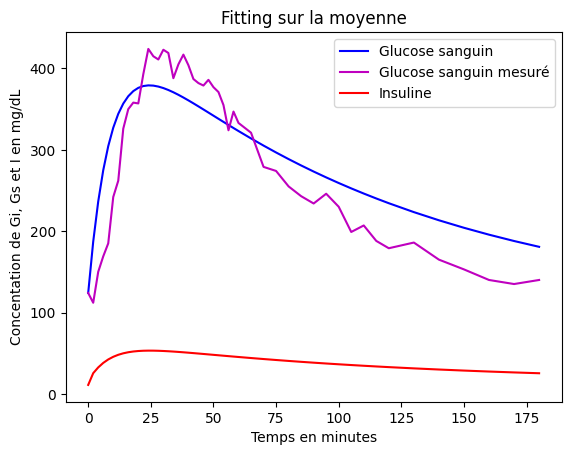

[8.48366420e-03 2.87367424e-10 1.11156564e-01 7.11950912e-01
 5.07960205e+00]
Figure : Souris n° 2 

Optimization terminated successfully.
         Current function value: 189633.294758
         Iterations: 108
         Function evaluations: 188


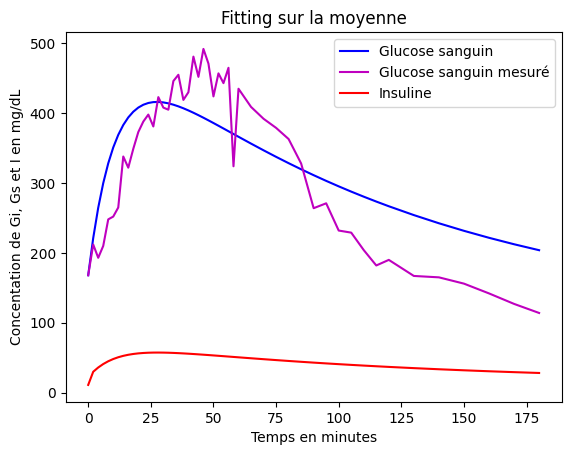

[7.89473636e-03 3.24453699e-10 9.04909434e-02 7.31675145e-01
 5.31048414e+00]
Figure : Souris n° 3 

Optimization terminated successfully.
         Current function value: 159512.138317
         Iterations: 104
         Function evaluations: 193


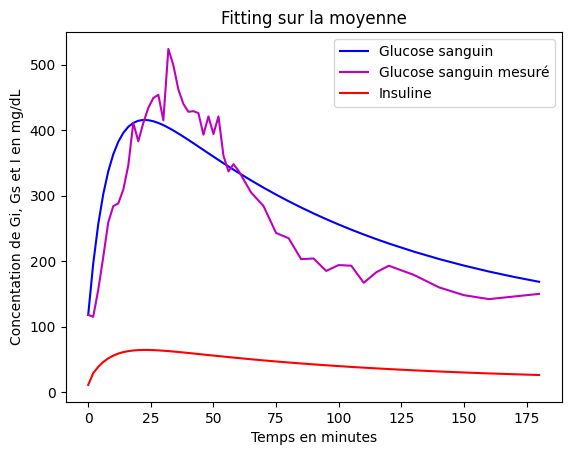

[1.02888784e-02 3.16252441e-10 1.16430031e-01 5.85624793e-01
 3.77951754e+00]
Figure : Souris n° 4 

Optimization terminated successfully.
         Current function value: 63588.251949
         Iterations: 103
         Function evaluations: 183


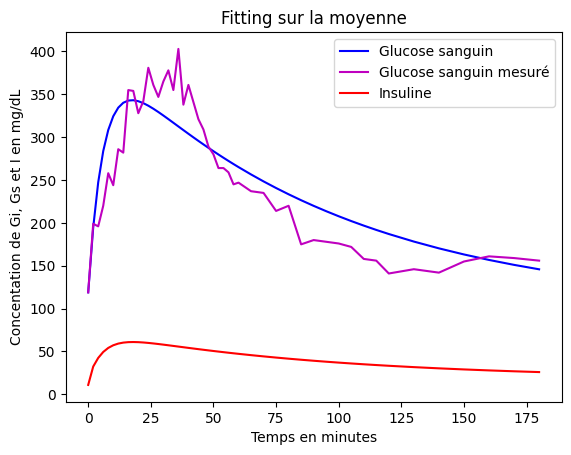

[1.06708101e-02 3.00746131e-10 1.63944061e-01 4.90620975e-01
 2.75829071e+00]
Figure : Souris n° 5 

Optimization terminated successfully.
         Current function value: 156592.787462
         Iterations: 224
         Function evaluations: 542


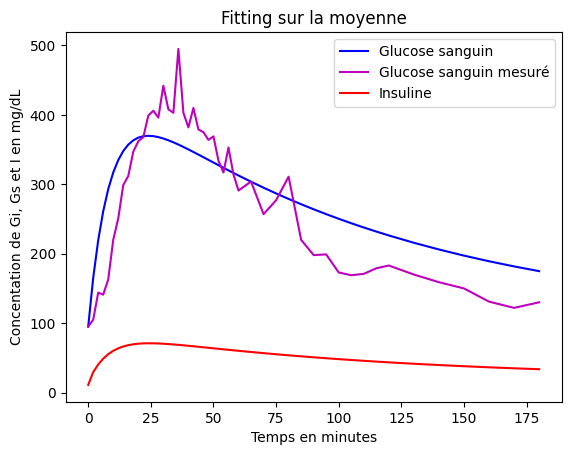

[8.70855225e-03 3.28363422e-10 1.17831172e-01 5.38609787e-01
 2.80568251e+00]
Figure : Souris n° 6 

Optimization terminated successfully.
         Current function value: 129323.804752
         Iterations: 115
         Function evaluations: 253


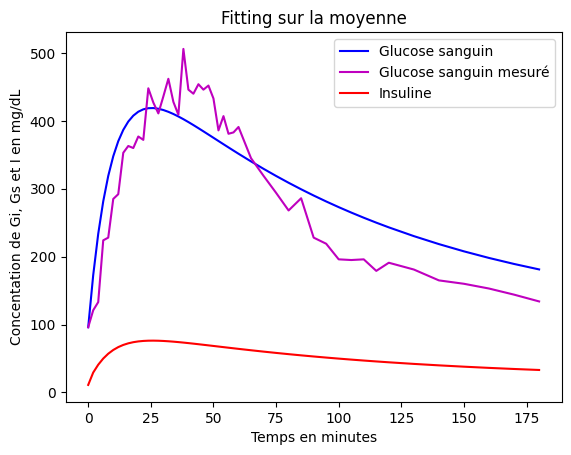

[9.45575374e-03 3.27709560e-10 1.05041917e-01 5.39247926e-01
 2.96322017e+00]
Figure : Souris n° 7 

Optimization terminated successfully.
         Current function value: 56275.832339
         Iterations: 102
         Function evaluations: 181


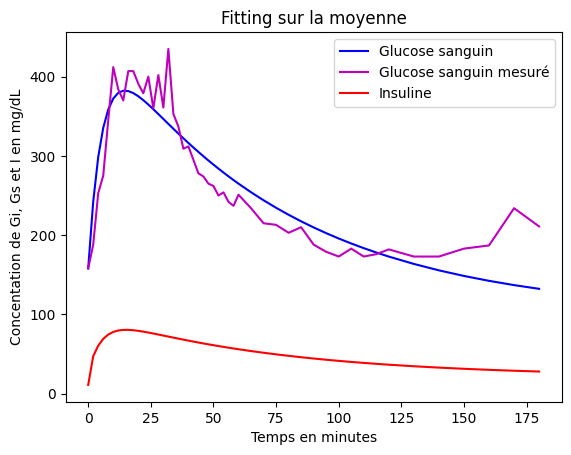

[1.36005044e-02 2.18794961e-10 1.77611666e-01 4.67171433e-01
 2.21791170e+00]
Figure : Souris n° 8 

Optimization terminated successfully.
         Current function value: 40243.007218
         Iterations: 90
         Function evaluations: 167


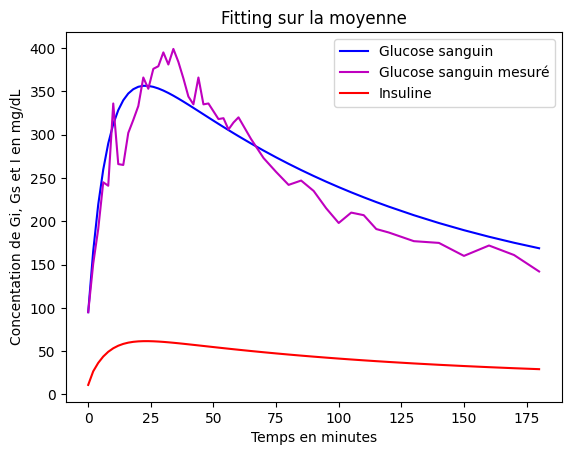

[8.82476381e-03 2.31146317e-10 1.26679517e-01 5.07838737e-01
 2.94037486e+00]
Figure : Souris n° 9 

Optimization terminated successfully.
         Current function value: 42739.748398
         Iterations: 84
         Function evaluations: 153


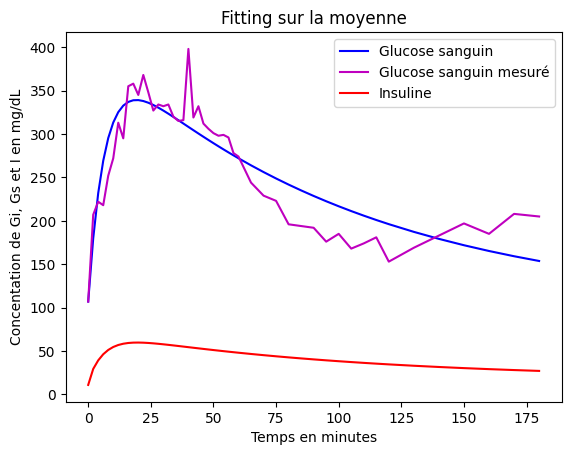

[9.69660180e-03 2.40133641e-10 1.51416460e-01 4.54862335e-01
 2.57943137e+00]
Figure : Souris n° 10 



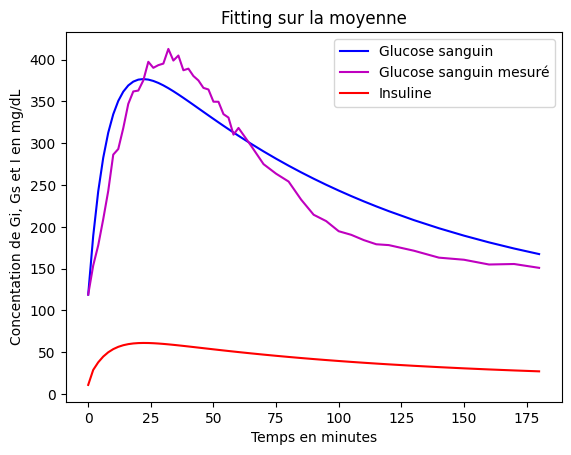

[9.42838919e-03 2.50278341e-10 1.24651650e-01 4.77793324e-01
 2.94183547e+00]
Figure : Souris n° 11 



In [13]:
def distance(param, y0, t, obs):
    a, b, c, d, e = param
    GiGsI = odeint(model, y0, t, args=(a, b, c, d, e))
    Gs = GiGsI[:,1]
    d = np.sum((obs - Gs)**2)
    return d + 1e8 * (a<0) + 1e8 * (b<0) + 1e8 * (c<0) + 1e8 * (d<0) + 1e8 * (e<0)

for k in range(1,12):
    obs = data[:,k]
    param = [a, b, c, d, e]
    y0 = [4500, obs[0], 11]
    
    param = fmin(distance, param, args=(y0, t, obs))
    a, b, c, d, e = param
    GiGsI = odeint(model, y0, t, args=(a, b, c, d, e))

    Gi_estime = GiGsI[:,0]
    Gs_estime = GiGsI[:,1]
    I_estime = GiGsI[:,2]

    #plt.title("Concentration calculée d'Insuline, de Glucose intestinale et de Glucose sanguin pour la Souris n°" + str(k))
    plt.title("Fitting sur la moyenne")
    plt.xlabel("Temps en minutes")
    plt.ylabel("Concentation de Gi, Gs et I en mg/dL")
    plt.plot(t, Gs_estime, "b", label="Glucose sanguin")
    plt.plot(t, obs, "m", label="Glucose sanguin mesuré")
    plt.plot(t, I_estime, "r", label="Insuline")
    plt.legend(loc="upper right")
    plt.show()
    print(param)
    print("Figure : Souris n°", k, "\n")

**Pensez à commenter ça dans le rapport**

## 3. Modèle « avancé »

Normalement le modèle à compartiments simples a du mal à fonctionner : est-ce le cas
chez vous ? Le modèle précédent suppose une absorption constante et donc un nombre
constant de transporteurs du glucose dans l’intestin. Mais le bolus de glucose chemine le
long de l’axe intestinal au cours du temps et la densité de transporteurs va diminuer :
l’absorption au cours du temps devrait donc diminuer.
Nous allons introduire une modification au modèle pour prendre en compte ce processus :  
— soit U la vitesse absorption : le glucose intestinal va quitter le compartiment intestinal à la vitesse U ∗ Gi ou Gi désigne le glucose intestinal  
— Nous supposerons que la quantité de transporteurs diminue exponentiellement.   Si le
bolus parcours l’axe gastrointestinal à vitesse constante alors la vitesse de transport
dans le sang va diminuer également de façon exponentielle : dU/dt = −kU.  
— La vitesse d’absorption à la sortie de l’estomac et l’entrée de l’intestin est inconnue
(donc à déterminer), elle correspond à la vitesse initiale U0.

##### 1) 

On obtient dans ce cas le modèle suivant :  
dU/dt = -kU avec U(0) = U0  
dGi/dt = -U x Gi  
dGs/dt = U x Gi - b x I x Gs  
dI/dt = c x Gs - d x I  

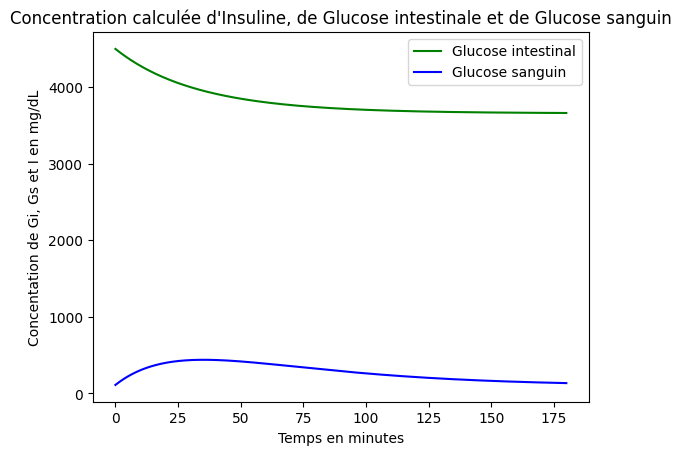

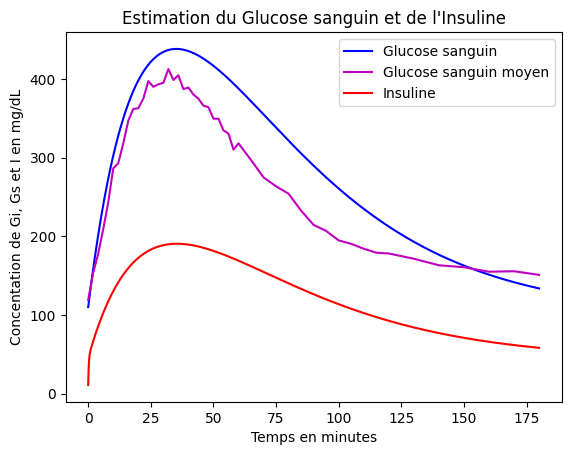

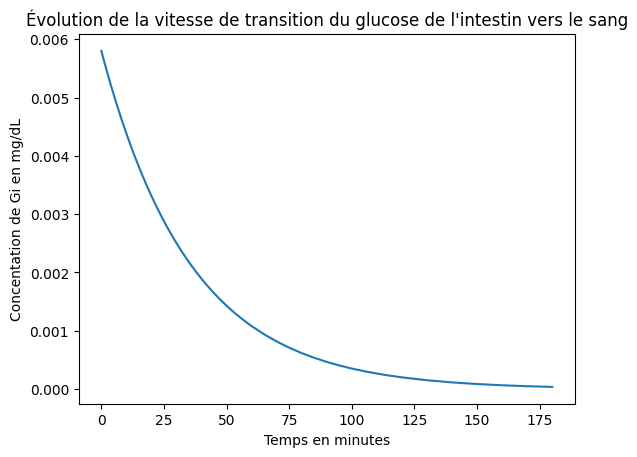

In [14]:
def advanced_model(GiGsI, t, U0, k, b, c, d, e):
    Gi, Gs, I = GiGsI
    Gb = 100
    U = U0*np.exp(-k*t)
    dGidt = -U*Gi
    dGsdt = U*Gi - b*I*Gs - c*max(0, Gs - Gb)
    dIdt = d*Gs - e*I
    return [dGidt, dGsdt, dIdt]

t2 = np.linspace(0,180,1000)
U0 = 5.8e-3
y0 = [4500, 110, 11]
k = 2.8e-2
b = 1.2e-6
c = 2.5e-2
d = 2
e = 4.6

GiGsI = odeint(advanced_model, y0, t2, args=(U0, k, b, c, d, e))
Gi_calc = GiGsI[:,0]
Gs_calc = GiGsI[:,1]
I_calc = GiGsI[:,2]

plt.title("Concentration calculée d'Insuline, de Glucose intestinale et de Glucose sanguin")
plt.xlabel("Temps en minutes")
plt.ylabel("Concentation de Gi, Gs et I en mg/dL")
plt.plot(t2, Gi_calc, "g", label="Glucose intestinal")
plt.plot(t2, Gs_calc, "b", label="Glucose sanguin")
plt.legend(loc="upper right")
plt.show()

plt.title("Estimation du Glucose sanguin et de l'Insuline")

plt.xlabel("Temps en minutes")
plt.ylabel("Concentation de Gi, Gs et I en mg/dL")
plt.plot(t2, Gs_calc, "b", label="Glucose sanguin")
plt.plot(t, Moyenne, "m", label="Glucose sanguin moyen")
plt.plot(t2, I_calc, "r", label="Insuline")
plt.legend(loc="upper right")
plt.show()

plt.title("Évolution de la vitesse de transition du glucose de l'intestin vers le sang")
plt.xlabel("Temps en minutes")
plt.ylabel("Concentation de Gi en mg/dL")
plt.plot(t, U0*np.exp(-k*t))
plt.show()

[5.76357191e-03 3.90346527e-02 1.34771843e-06 2.53173260e-02
 2.03472193e+00 4.59215582e+00]


C:\Users\Ihsân-san\AppData\Local\Temp\ipykernel_7624\3074091384.py:14: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  param = fmin(distance, param, args=(y0, t, obs))


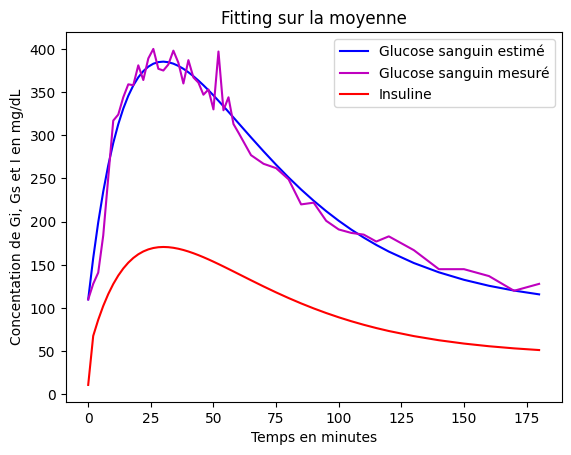

Figure : Souris n° 1 

Optimization terminated successfully.
         Current function value: 32034.474772
         Iterations: 267
         Function evaluations: 444
[5.09779813e-03 2.66858618e-02 1.18160088e-06 2.86985150e-02
 2.38193120e+00 5.10834625e+00]


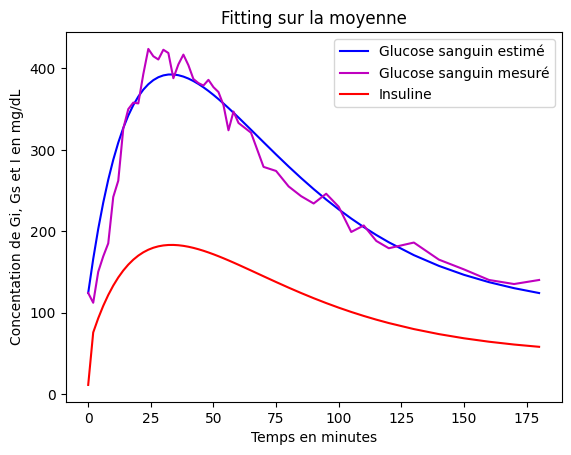

Figure : Souris n° 2 

[4.67331527e-03 2.39286745e-02 9.38079317e-07 2.40433500e-02
 1.48831393e-05 8.73296814e+00]


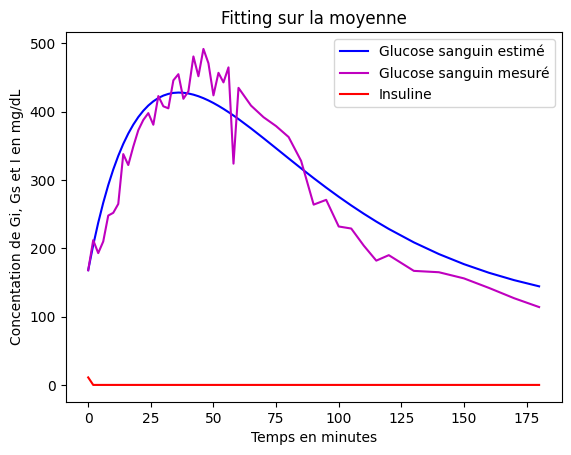

Figure : Souris n° 3 

Optimization terminated successfully.
         Current function value: 59218.277399
         Iterations: 217
         Function evaluations: 366
[6.48875547e-03 3.01264591e-02 1.12794535e-06 3.16550426e-02
 1.97333198e+00 5.50283572e+00]


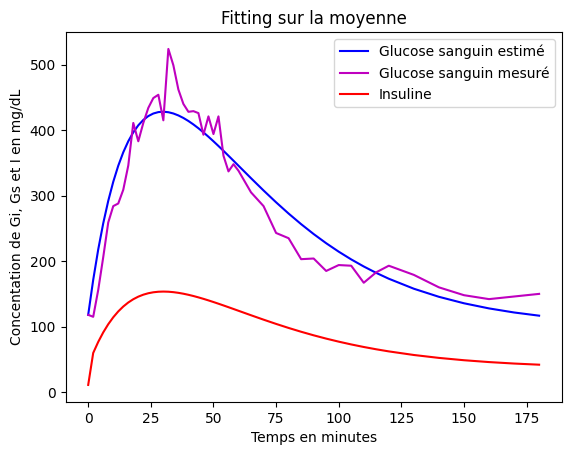

Figure : Souris n° 4 

Optimization terminated successfully.
         Current function value: 26445.368281
         Iterations: 272
         Function evaluations: 470
[5.83854202e-03 5.63859069e-02 1.20367533e-06 2.26347476e-02
 2.10982140e+00 5.17051173e+00]


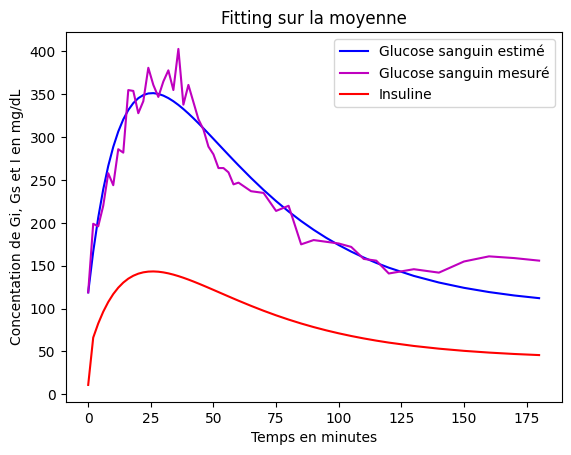

Figure : Souris n° 5 

[5.53496076e-03 2.90144994e-02 1.35668167e-06 3.01430090e-02
 2.03373466e+00 4.61269228e+00]


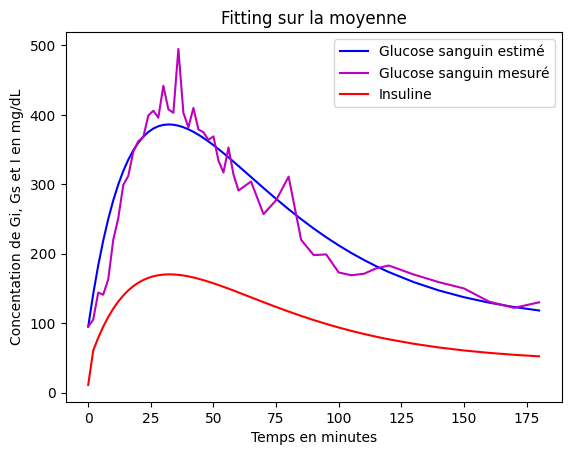

Figure : Souris n° 6 

[6.25103898e-03 2.80727079e-02 1.05672356e-06 2.89262916e-02
 2.21644578e+00 5.18582688e+00]


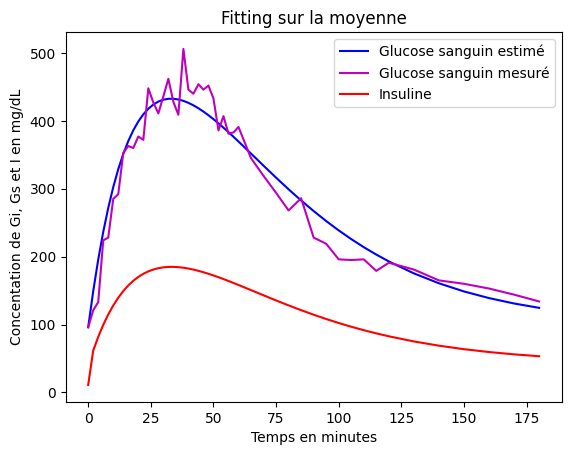

Figure : Souris n° 7 

[9.91027332e-03 1.35944762e-01 4.07447105e-08 1.57043904e-02
 2.78618193e+00 5.03523866e+00]


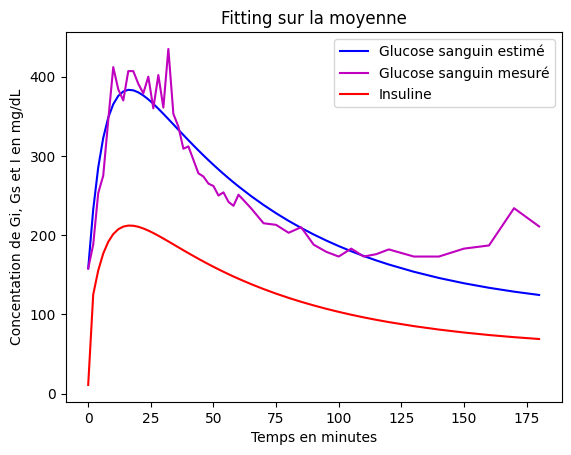

Figure : Souris n° 8 

Optimization terminated successfully.
         Current function value: 16562.350275
         Iterations: 231
         Function evaluations: 400
[6.00402793e-03 6.02211767e-02 1.31861321e-06 1.53133462e-02
 1.93502048e+00 5.13365714e+00]


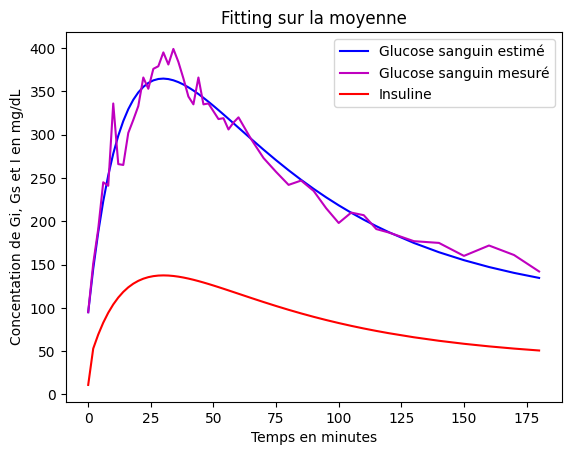

Figure : Souris n° 9 

Optimization terminated successfully.
         Current function value: 34738.167906
         Iterations: 236
         Function evaluations: 399
[7.09495894e-03 9.33471190e-02 1.22512398e-06 1.31643941e-02
 1.94809179e+00 4.73786497e+00]


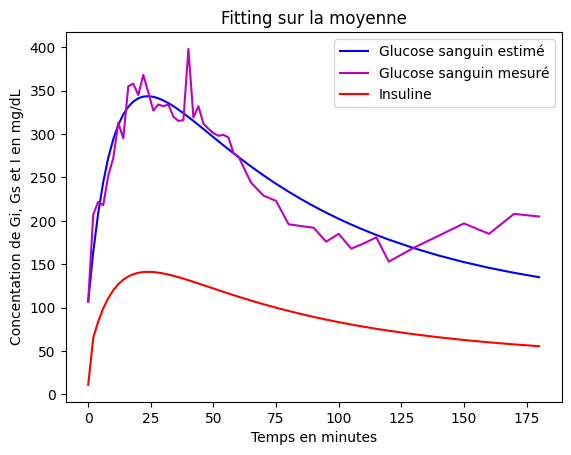

Figure : Souris n° 10 

Optimization terminated successfully.
         Current function value: 10486.934488
         Iterations: 457
         Function evaluations: 965
[5.51546905e-03 3.85615590e-02 1.29229032e-06 2.38180297e-02
 1.67643731e+00 5.59788853e+00]


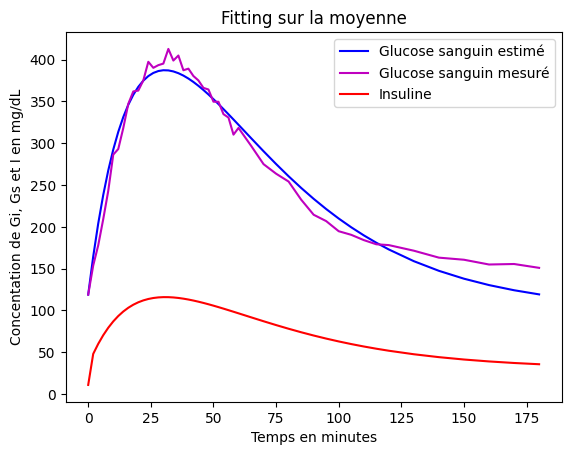

Figure : Souris n° 11 



In [15]:
def distance(param, y0, t, obs):
    U0, k, b, c, d, e = param
    GiGsI = odeint(advanced_model, y0, t, args=(U0, k, b, c, d, e))
    Gs = GiGsI[:,1]
    dist = np.sum((obs - Gs)**2)
    return dist + 1e8 *(max(param<0))

for j in range(1,12):
    obs = data[:,j]
    U0, k, b, c, d, e = 1e-1, 1e-1, 7e-7, 6e-2, 1, 3.5
    param = [U0, k, b, c, d, e]
    y0 = [4500, obs[0], 11]
    
    param = fmin(distance, param, args=(y0, t, obs))
    U0, k, b, c, d, e = param
    print(param)
    UGiGsI = odeint(advanced_model, y0, t, args=(U0, k, b, c, d, e))

    Gi_estime = UGiGsI[:,0]
    Gs_estime = UGiGsI[:,1]
    I_estime = UGiGsI[:,2]

    plt.title("Concentration calculée d'Insuline, de Glucose intestinale et de Glucose sanguin")
    #plt.title("Fitting sur la")
    plt.xlabel("Temps en minutes")
    plt.ylabel("Concentation de Gi, Gs et I en mg/dL")
    plt.plot(t, Gs_estime, "b", label="Glucose sanguin estimé")
    plt.plot(t, obs, "m", label="Glucose sanguin mesuré")
    plt.plot(t, I_estime, "r", label="Insuline")
    plt.legend(loc="upper right")
    plt.show()
    print("Figure : Souris n°", j, "\n")

On constate cette fois que contrairement à avant, le glucose sanguin estimé (courbe en bleu) ressemble fortement au glucose sanguin mesuré (courbe magenta). Ainsi, on a gagné en précision avec ce modèle, surtout au niveau de la décroissance du glucose estimée qui cette fois-ci semble plus fidèle aux données réelles. 

On teste cette fois-ci de fixer un paramètre :

Optimization terminated successfully.
         Current function value: 16157.851996
         Iterations: 94
         Function evaluations: 172
[5.67853202e-03 3.26589937e-02 8.26324807e-10 1.31604151e+00]


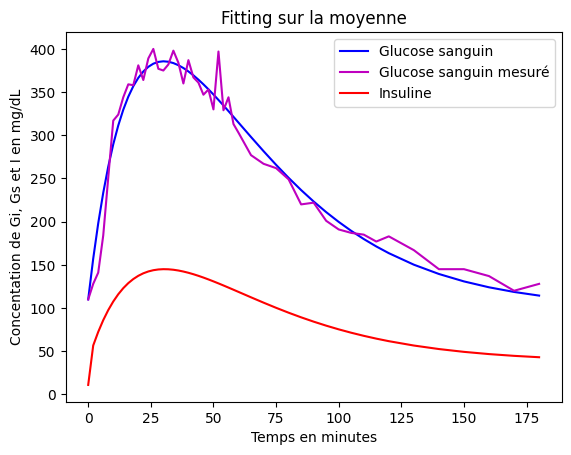

Figure : Souris n° 1 

Optimization terminated successfully.
         Current function value: 32031.226634
         Iterations: 212
         Function evaluations: 491
[5.10976741e-03 2.56776532e-02 1.00892570e-09 1.22942445e+00]


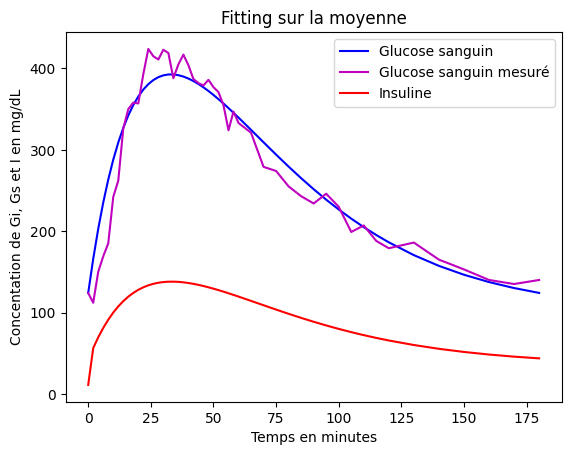

Figure : Souris n° 2 

Optimization terminated successfully.
         Current function value: 75121.254406
         Iterations: 220
         Function evaluations: 492
[4.86989777e-03 1.89671157e-02 1.02256830e-09 1.54815162e+00]


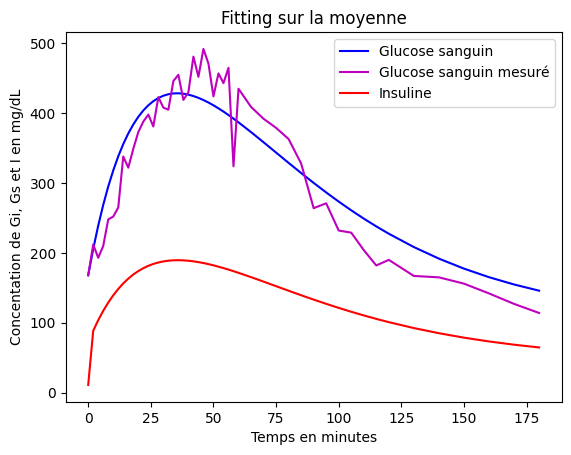

Figure : Souris n° 3 

Optimization terminated successfully.
         Current function value: 59252.618623
         Iterations: 92
         Function evaluations: 160
[6.47710875e-03 3.21681838e-02 7.55679127e-10 1.26280005e+00]


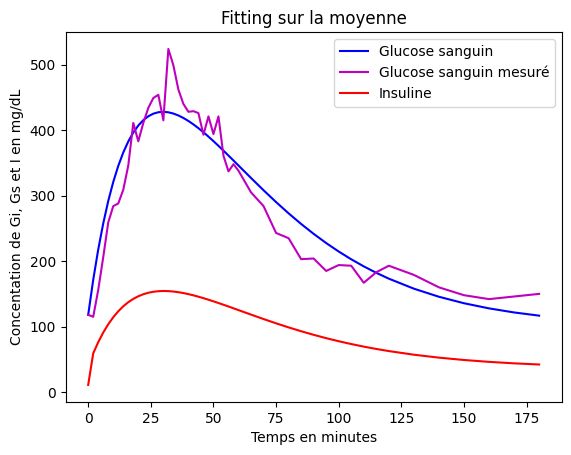

Figure : Souris n° 4 

Optimization terminated successfully.
         Current function value: 27223.709769
         Iterations: 206
         Function evaluations: 475
[5.55788347e-03 4.18374077e-02 6.62966887e-10 1.14814285e+00]


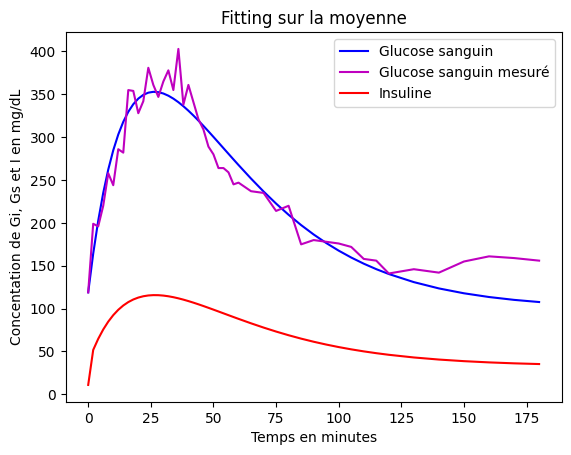

Figure : Souris n° 5 

Optimization terminated successfully.
         Current function value: 55621.216063
         Iterations: 92
         Function evaluations: 167
[5.53331544e-03 2.94603240e-02 1.00685193e-09 1.14579628e+00]


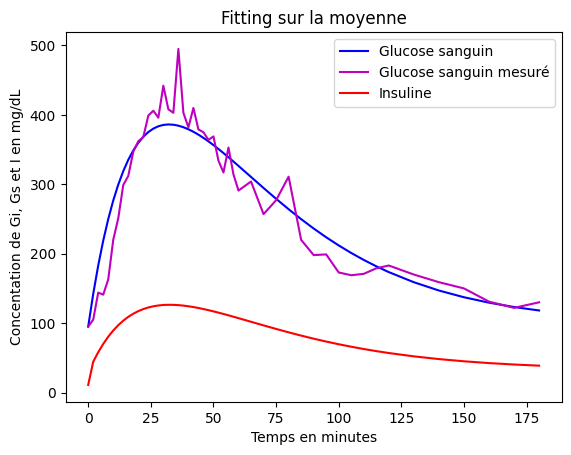

Figure : Souris n° 6 

Optimization terminated successfully.
         Current function value: 34919.892262
         Iterations: 93
         Function evaluations: 168
[6.25503729e-03 2.72067294e-02 8.29863822e-10 1.33666982e+00]


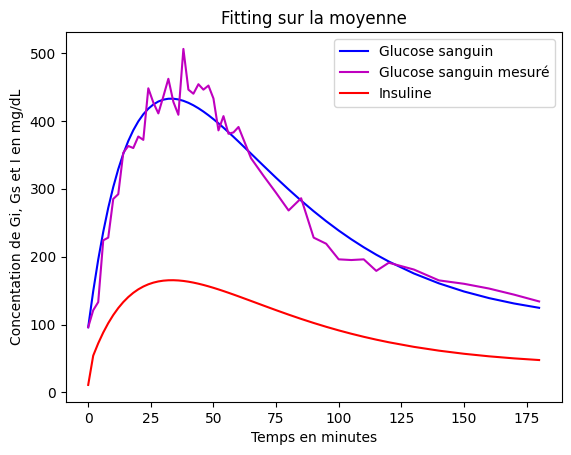

Figure : Souris n° 7 

Optimization terminated successfully.
         Current function value: 76880.375307
         Iterations: 88
         Function evaluations: 162
[7.76780442e-03 6.53215049e-02 4.48263340e-10 8.45277687e-01]


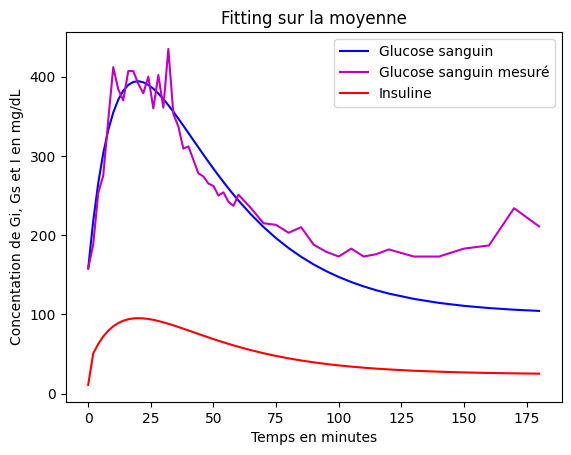

Figure : Souris n° 8 

Optimization terminated successfully.
         Current function value: 22036.173599
         Iterations: 121
         Function evaluations: 234
[5.09714049e-03 2.85980807e-02 8.61924467e-10 1.38216848e+00]


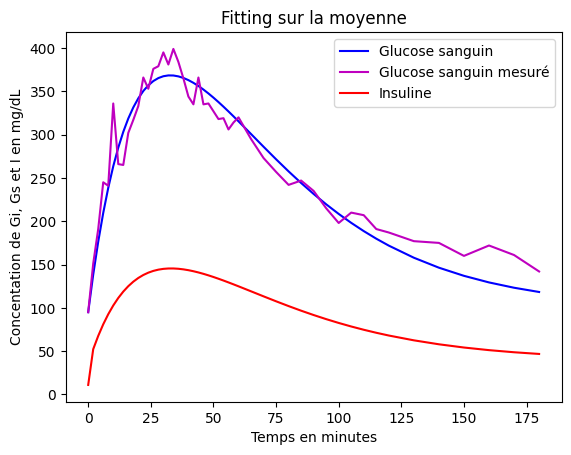

Figure : Souris n° 9 

Optimization terminated successfully.
         Current function value: 50686.737931
         Iterations: 222
         Function evaluations: 512
[5.31528062e-03 3.75747379e-02 6.92918534e-10 1.41441285e+00]


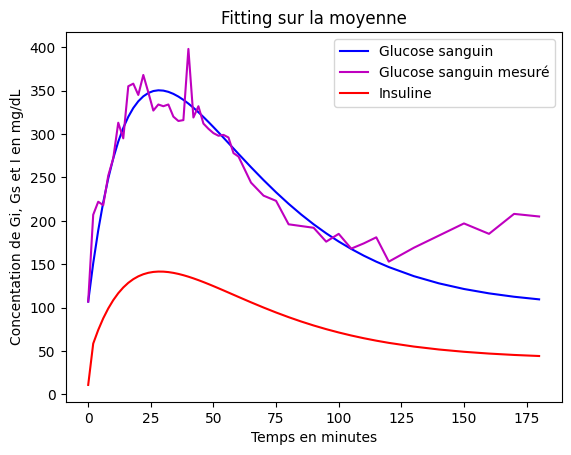

Figure : Souris n° 10 

Optimization terminated successfully.
         Current function value: 10517.184816
         Iterations: 94
         Function evaluations: 174
[5.42478016e-03 3.00110872e-02 8.48905671e-10 1.38838250e+00]


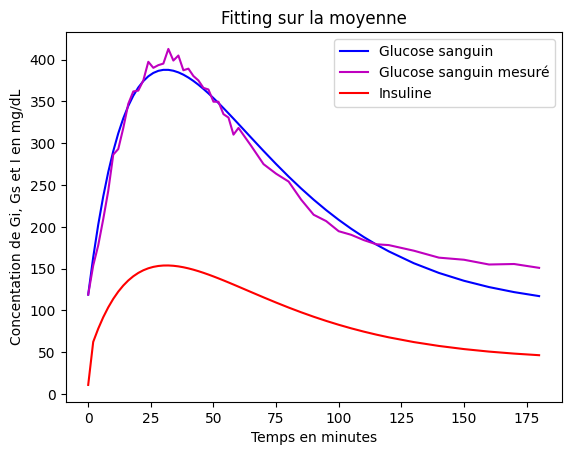

Figure : Souris n° 11 



In [23]:
def distance(param, y0, t, obs):
    U0, k, b, d = param
    UGiGsI = odeint(advanced_model, y0, t, args=(U0, k, b, 3e-2, d, 3.5))
    Gs = UGiGsI[:,1]
    dist = np.sum((obs - Gs)**2)
    return dist + 1e8*(max(param<0))

Matrice_param = []

for j in range(1,12):
    obs = data[:,j]
    U0, k, b, c, d, e = 5e-3, 1e-1, 7e-10, 3e-2, 1, 3.5
    param = [U0, k, b, d]
    y0 = [4500, obs[0], 11]
    param = fmin(distance, param, args=(y0, t, obs))
    U0, k, b, d = param
    print(param)
    UGiGsI = odeint(advanced_model, y0, t, args=(U0, k, b, c, d, e))

    Gi_estime = UGiGsI[:,0]
    Gs_estime = UGiGsI[:,1]
    I_estime = UGiGsI[:,2]

    Matrice_param.append(['Souris '+ str(j), U0, k, b, c, d, e])

    #plt.title("Concentration calculée d'Insuline, de Glucose intestinale et de Glucose sanguin pour la Souris n°" + str(j))
    plt.title("Fitting sur la moyenne")
    plt.xlabel("Temps en minutes")
    plt.ylabel("Concentation de Gi, Gs et I en mg/dL")
    plt.plot(t, Gs_estime, "b", label="Glucose sanguin")
    plt.plot(t, obs, "m", label="Glucose sanguin mesuré")
    plt.plot(t, I_estime, "r", label="Insuline")
    plt.legend(loc="upper right")
    plt.show()
    print("Figure : Souris n°", j, "\n")
Matrice_param = np.array(Matrice_param)
#print(Matrice_param)

On a fini par fixer e et c après de nombreux tests.

## 4. Modèle pathologique

On choisit le modèle avec seulement 4 paramètres libres pour pouvoir comparer deux jeux de paramètres identiques. C'est-à-dire calculé pour le même minimum d'erreur.

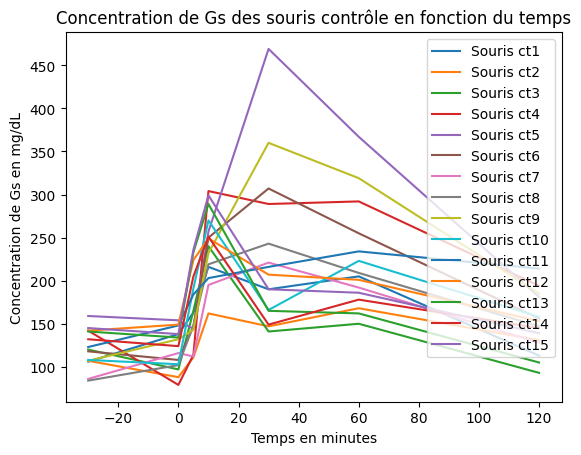

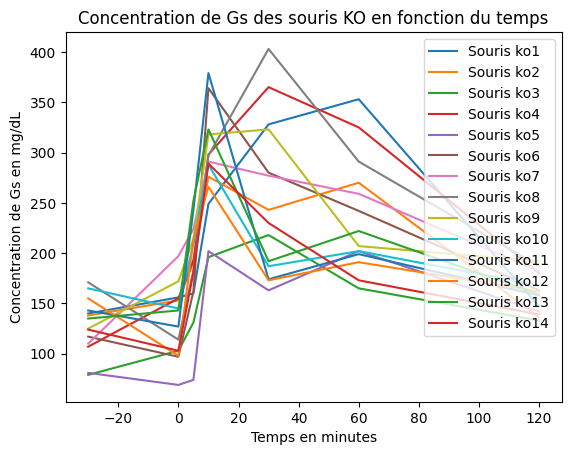

In [18]:
data_ct = np.loadtxt('control.txt')
data_ko = np.loadtxt('ko.txt')
t3 = data_ct[:,0]
G0 = 2500

plt.title("Concentration de Gs des souris contrôle en fonction du temps")
plt.xlabel("Temps en minutes")
plt.ylabel("Concentration de Gs en mg/dL")
for k in range(1, 16):
    plt.plot(t3, data_ct[:,k], label="Souris ct"+str(k))
    plt.legend(loc="upper right")
plt.show()

plt.title("Concentration de Gs des souris KO en fonction du temps")
plt.xlabel("Temps en minutes")
plt.ylabel("Concentration de Gs en mg/dL")
for k in range(1, 15):
    plt.plot(t3, data_ko[:,k], label="Souris ko"+str(k))
    plt.legend(loc="upper right")
plt.show()

[3.54170187e-03 3.21348091e-02 4.63286377e-10 5.96643677e-01]


C:\Users\Ihsân-san\AppData\Local\Temp\ipykernel_7624\1593579397.py:11: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  param = fmin(distance, param, args=(y0, t3, obs))


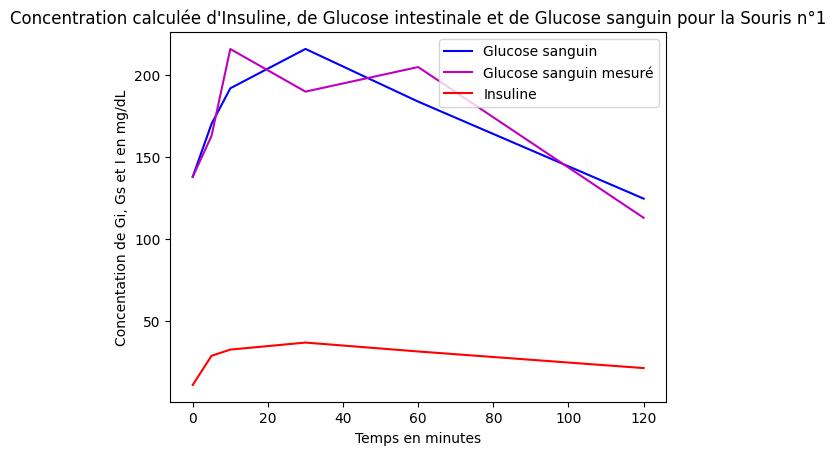

Figure : Souris n° 1 

Optimization terminated successfully.
         Current function value: 1344.804978
         Iterations: 77
         Function evaluations: 138
[2.25192322e-03 2.34475156e-02 8.59454485e-10 7.71809731e-01]


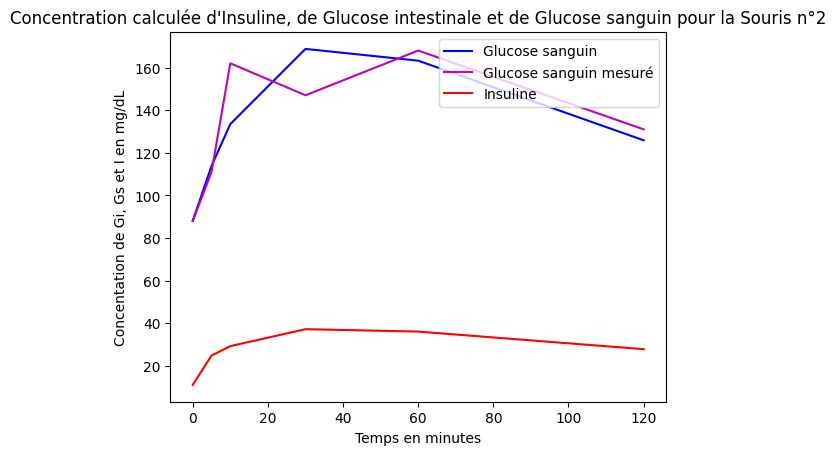

Figure : Souris n° 2 

Optimization terminated successfully.
         Current function value: 3064.788492
         Iterations: 136
         Function evaluations: 252
[1.27795410e-02 2.03586835e-01 1.40822172e-10 4.73817650e+00]


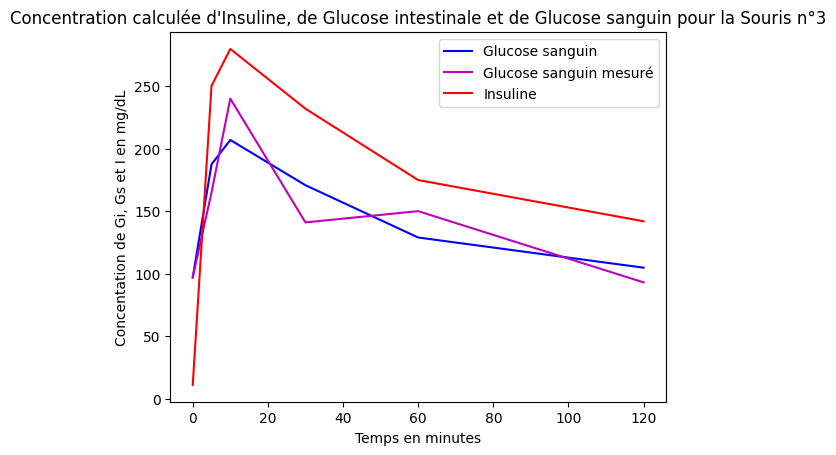

Figure : Souris n° 3 

Optimization terminated successfully.
         Current function value: 10380.269344
         Iterations: 194
         Function evaluations: 466
[7.60366574e-03 2.34589649e-02 7.44751313e-10 6.94299209e-01]


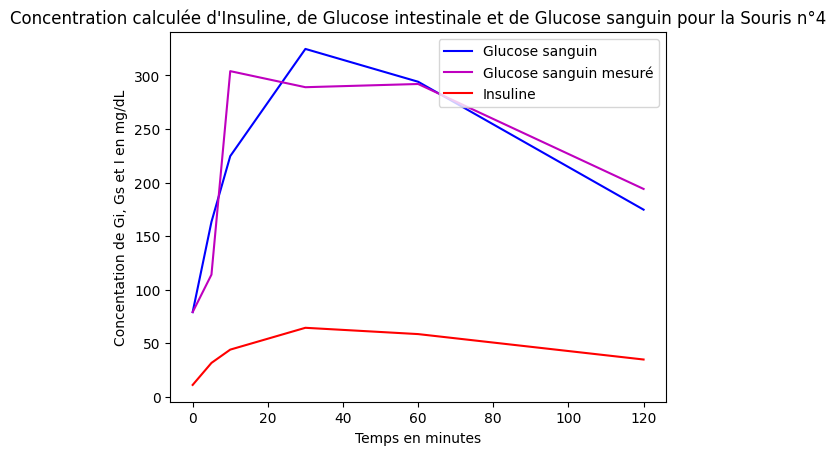

Figure : Souris n° 4 

Optimization terminated successfully.
         Current function value: 16688.715290
         Iterations: 92
         Function evaluations: 165
[8.44278343e-03 1.77184876e-02 2.14472717e-10 6.44132906e-01]


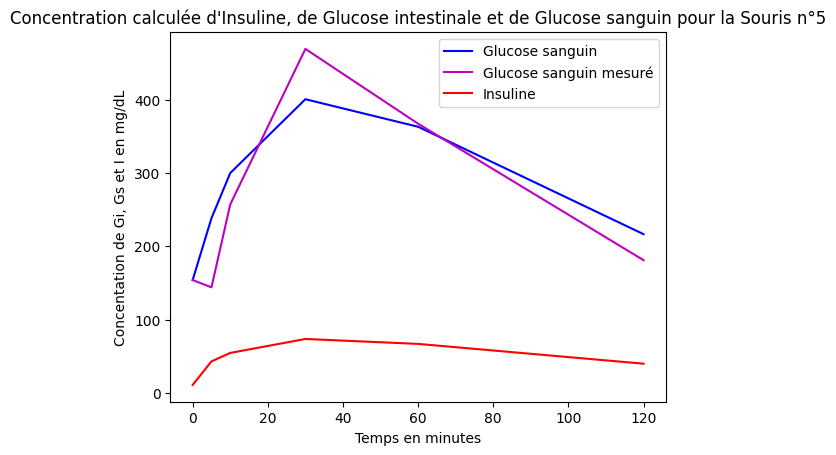

Figure : Souris n° 5 

Optimization terminated successfully.
         Current function value: 1524.716028
         Iterations: 68
         Function evaluations: 126
[6.89283080e-03 2.81221163e-02 3.58957346e-10 4.12351736e-01]


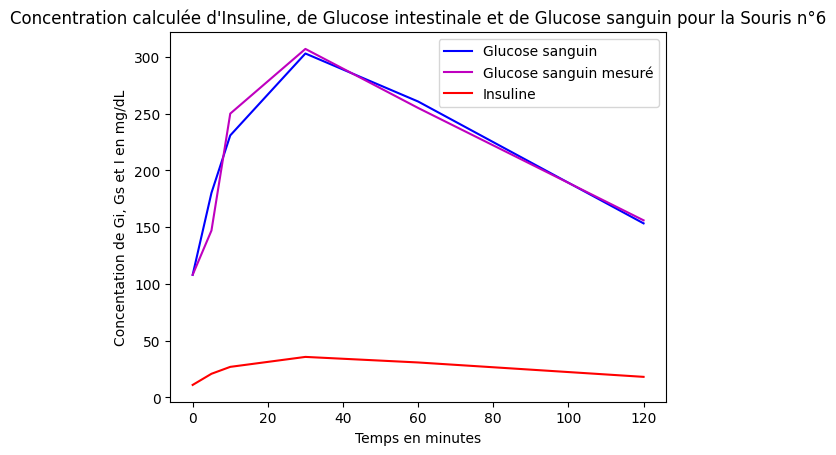

Figure : Souris n° 6 

Optimization terminated successfully.
         Current function value: 1952.974383
         Iterations: 91
         Function evaluations: 165
[3.55307770e-03 2.69648984e-02 5.22282372e-10 8.21977498e-01]


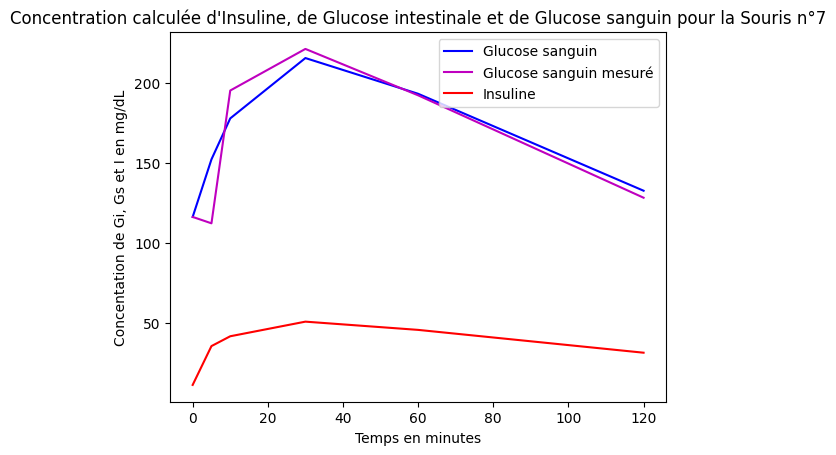

Figure : Souris n° 7 

Optimization terminated successfully.
         Current function value: 805.751704
         Iterations: 94
         Function evaluations: 197
[5.48072229e-03 3.30775824e-02 4.71655969e-10 5.51541615e-01]


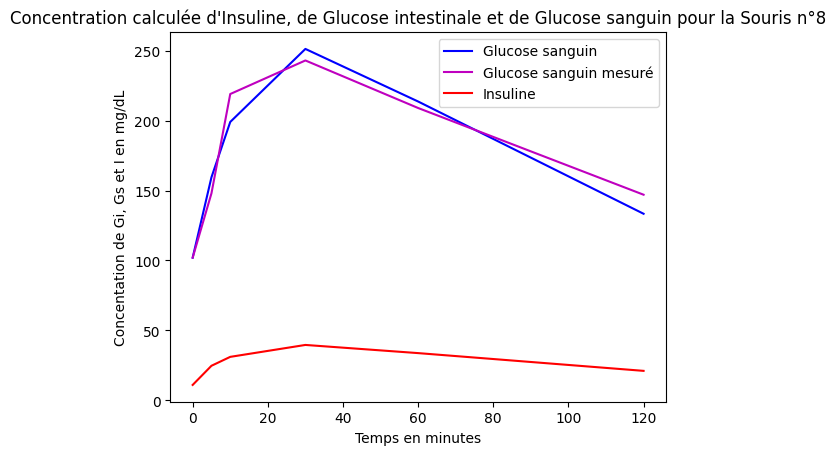

Figure : Souris n° 8 

Optimization terminated successfully.
         Current function value: 4218.276848
         Iterations: 69
         Function evaluations: 128
[6.35571989e-03 1.65549324e-02 6.13091923e-10 7.29182278e-01]


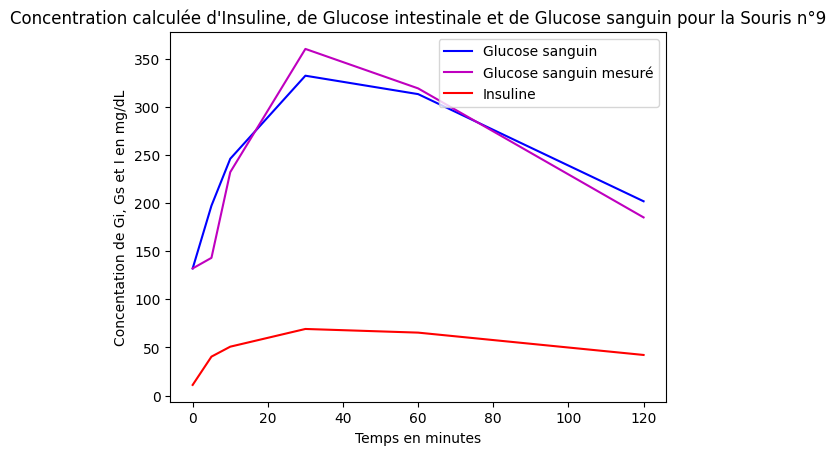

Figure : Souris n° 9 

Optimization terminated successfully.
         Current function value: 11323.198050
         Iterations: 200
         Function evaluations: 356
[1.23201123e-02 1.25122631e-01 4.19932169e-08 1.03089080e+00]


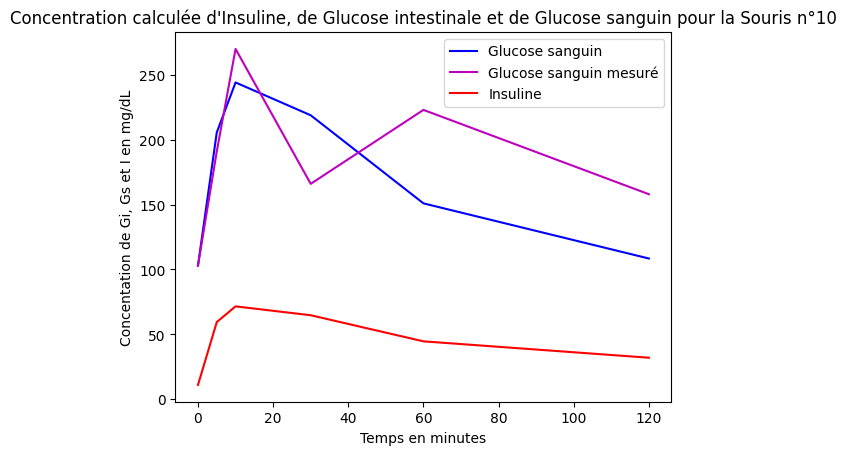

Figure : Souris n° 10 

Optimization terminated successfully.
         Current function value: 638.332301
         Iterations: 70
         Function evaluations: 129
[2.44550982e-03 4.88700798e-03 8.07127452e-10 1.29223404e+00]


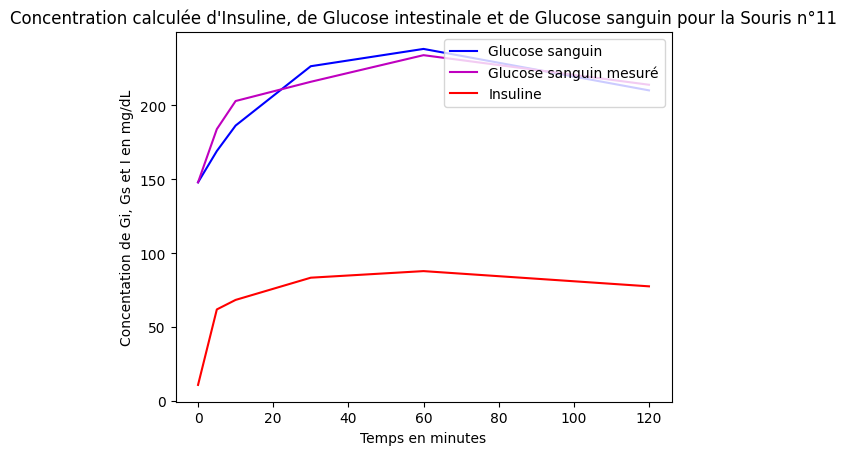

Figure : Souris n° 11 

Optimization terminated successfully.
         Current function value: 3803.870410
         Iterations: 102
         Function evaluations: 199
[6.35433734e-03 5.83051107e-02 1.06139550e-10 2.03906554e-01]


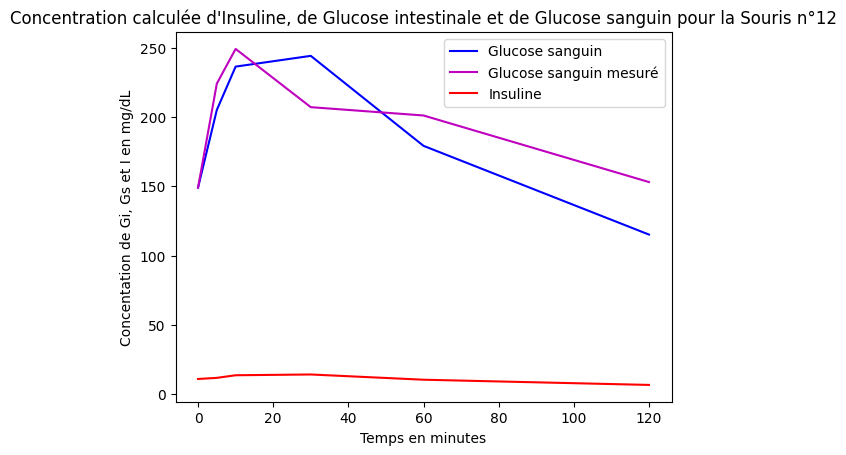

Figure : Souris n° 12 

Optimization terminated successfully.
         Current function value: 2571.644416
         Iterations: 123
         Function evaluations: 224
[1.87365458e-02 2.48885677e-01 1.20777718e-08 7.93516576e-01]


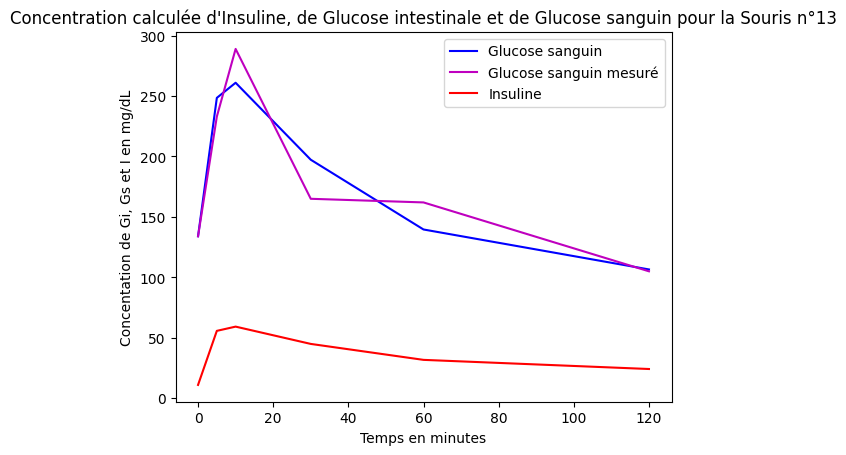

Figure : Souris n° 13 

Optimization terminated successfully.
         Current function value: 9395.091144
         Iterations: 299
         Function evaluations: 544
[5.14388035e-03 5.27915780e-02 2.70009025e-12 7.46614567e-08]


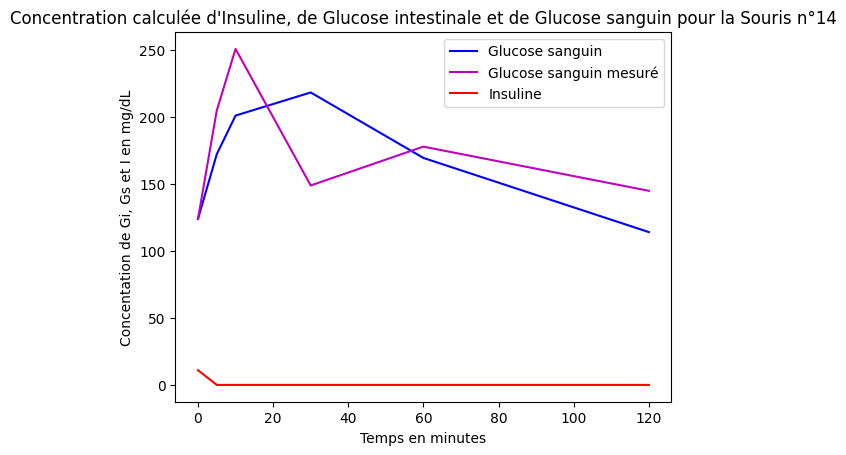

Figure : Souris n° 14 

Optimization terminated successfully.
         Current function value: 3888.247730
         Iterations: 302
         Function evaluations: 649
[1.59073057e-02 1.75007506e-01 1.95176252e-09 6.72171242e-03]


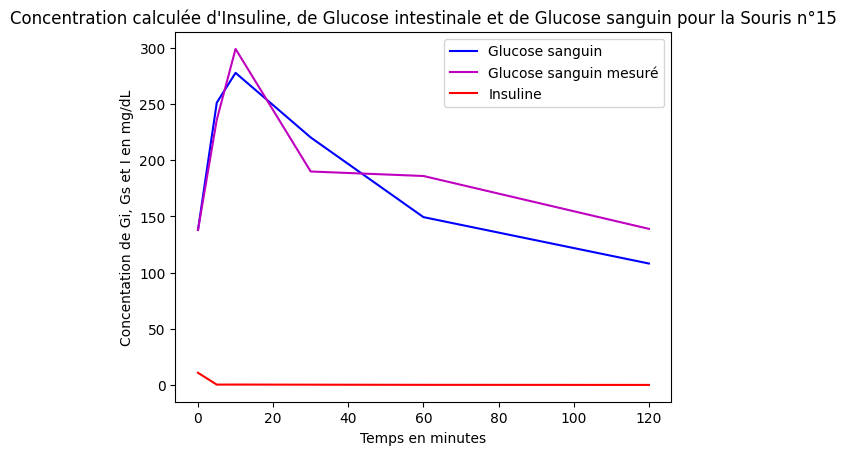

Figure : Souris n° 15 



In [19]:
t3 = data_ct[1:,0]

M_ct = np.zeros((15,4))

for j in range(1,16):
    obs = data_ct[1:,j]
    U0, k, b, c, d, e = 5e-3, 2e-2, 7e-10, 3e-2, 0.7, 3.5
    param = [U0, k, b, d]
    y0 = [2500, obs[0], 11]

    param = fmin(distance, param, args=(y0, t3, obs))
    U0, k, b, d = param
    print(param)
    UGiGsI = odeint(advanced_model, y0, t3, args=(U0, k, b, c, d, e))
    M_ct[j-1] = param

    Gi_estime = UGiGsI[:,0]
    Gs_estime = UGiGsI[:,1]
    I_estime = UGiGsI[:,2]

    plt.title("Concentration calculée d'Insuline, de Glucose intestinale et de Glucose sanguin pour la Souris n°" + str(j))
    plt.xlabel("Temps en minutes")
    plt.ylabel("Concentation de Gi, Gs et I en mg/dL")
    plt.plot(data_ct[1:,0], Gs_estime, "b", label="Glucose sanguin")
    plt.plot(data_ct[1:,0], obs, "m", label="Glucose sanguin mesuré")
    plt.plot(data_ct[1:,0], I_estime, "r", label="Insuline")
    plt.legend(loc="upper right")
    plt.show()
    print("Figure : Souris n°", j, "\n")
        
Mean_ct = np.mean(M_ct,axis=0)
Std_ct = np.std(M_ct, axis=0)

Optimization terminated successfully.
         Current function value: 7648.832073
         Iterations: 59
         Function evaluations: 109
[6.09514484e-03 1.76436201e-02 6.91510454e-10 6.79462365e-01]


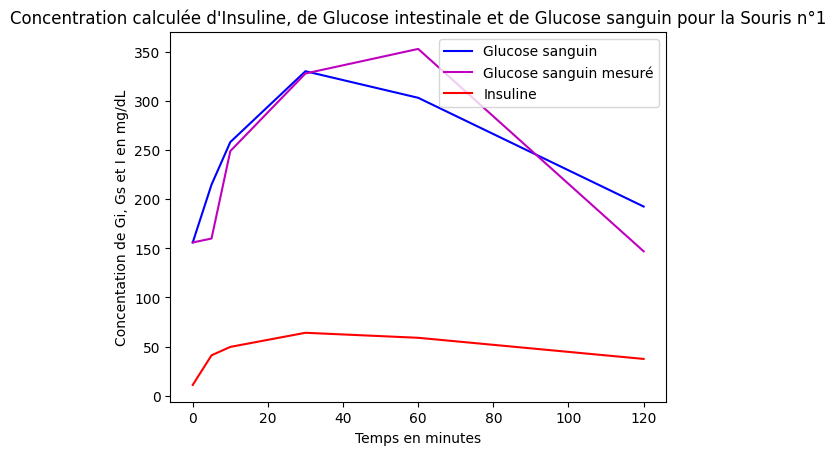

Figure : Souris n° 1 

Optimization terminated successfully.
         Current function value: 4158.022688
         Iterations: 65
         Function evaluations: 126
[5.33178986e-03 2.65379573e-02 7.75273175e-10 4.84202447e-01]


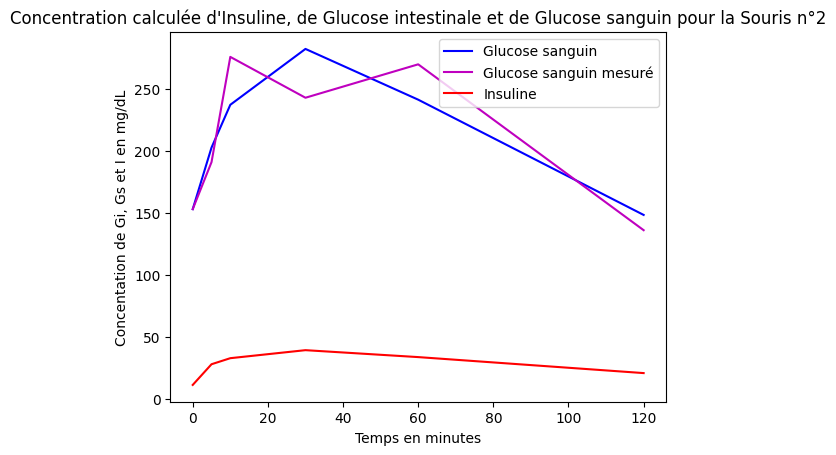

Figure : Souris n° 2 

Optimization terminated successfully.
         Current function value: 951.533145
         Iterations: 235
         Function evaluations: 545
[4.71999346e-03 4.35480389e-02 7.23637555e-10 8.54362752e-03]


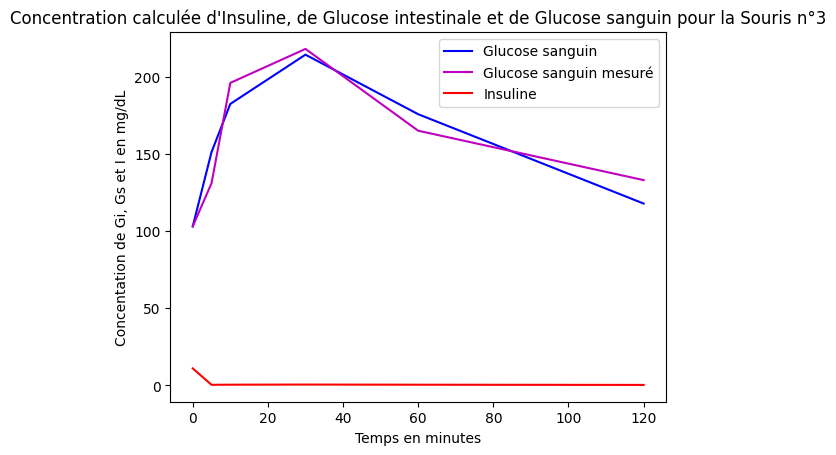

Figure : Souris n° 3 

Optimization terminated successfully.
         Current function value: 1647.221755
         Iterations: 81
         Function evaluations: 142
[7.58738752e-03 2.11459032e-02 7.49448057e-10 4.93107605e-01]


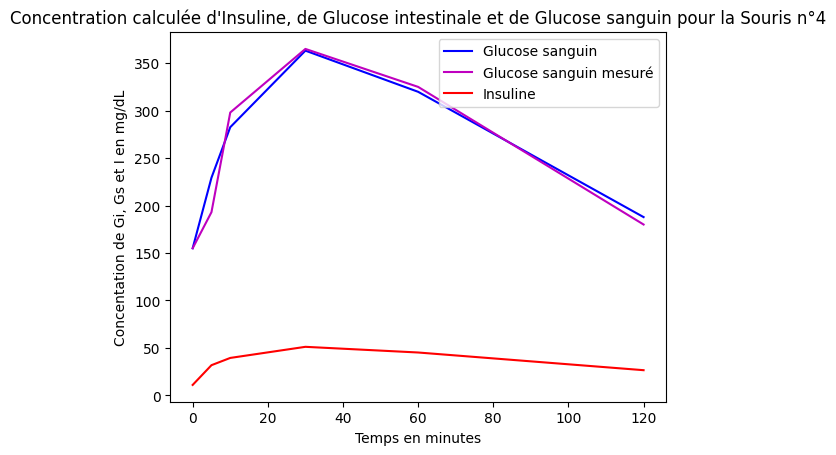

Figure : Souris n° 4 

Optimization terminated successfully.
         Current function value: 6342.798568
         Iterations: 72
         Function evaluations: 132
[3.44639242e-03 2.35556534e-02 7.51306145e-10 7.64737111e-01]


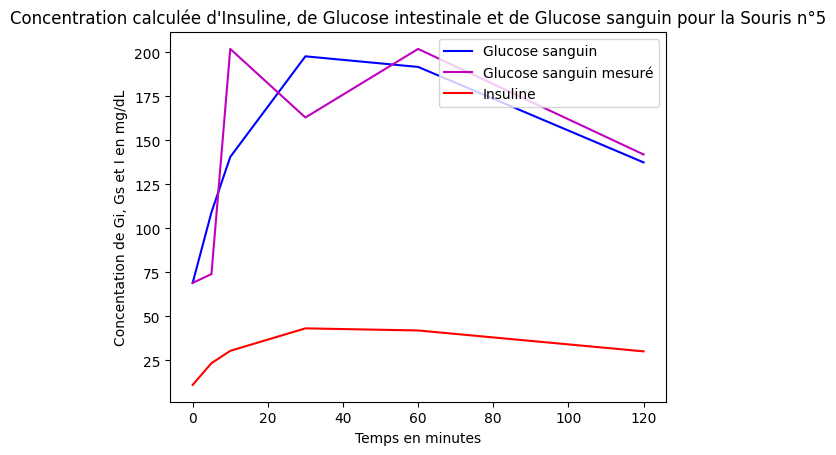

Figure : Souris n° 5 

Optimization terminated successfully.
         Current function value: 12869.766582
         Iterations: 128
         Function evaluations: 240
[1.29655844e-02 6.37557850e-02 4.61098247e-12 4.17503760e-01]


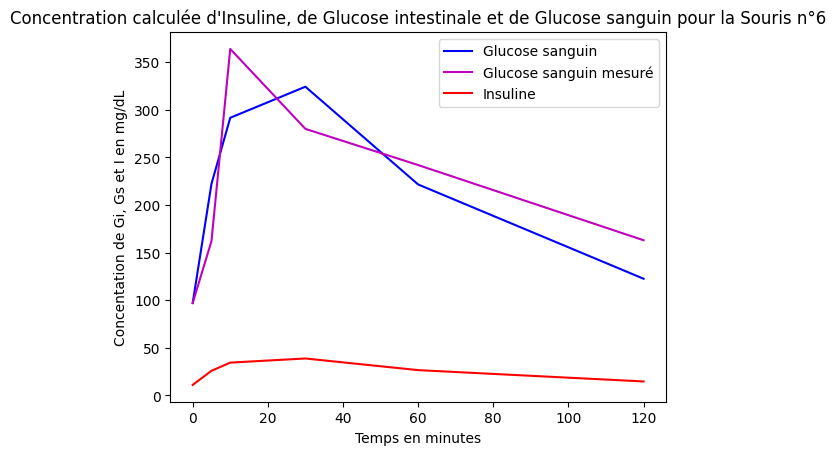

Figure : Souris n° 6 

Optimization terminated successfully.
         Current function value: 1566.416949
         Iterations: 58
         Function evaluations: 111
[4.44221542e-03 1.77076375e-02 7.73021329e-10 7.62334076e-01]


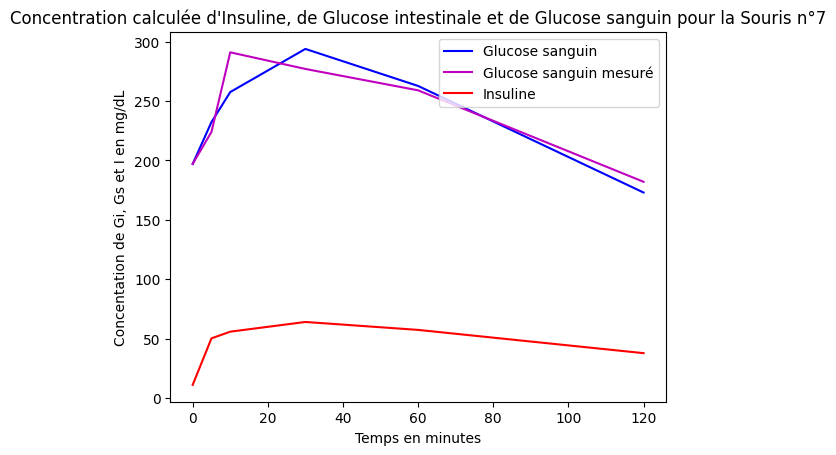

Figure : Souris n° 7 

Optimization terminated successfully.
         Current function value: 2655.010163
         Iterations: 80
         Function evaluations: 145
[9.89019670e-03 2.84969748e-02 4.96992266e-10 6.74239693e-01]


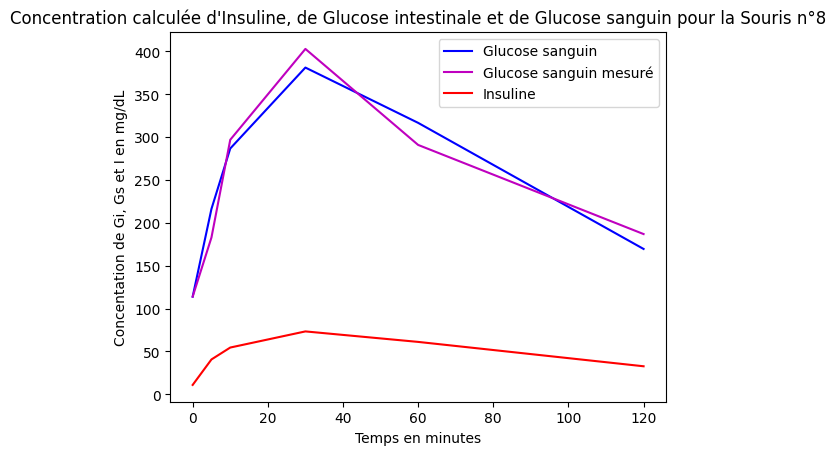

Figure : Souris n° 8 

Optimization terminated successfully.
         Current function value: 6351.780931
         Iterations: 70
         Function evaluations: 125
[8.00759319e-03 4.18620068e-02 2.46724902e-11 5.83995144e-01]


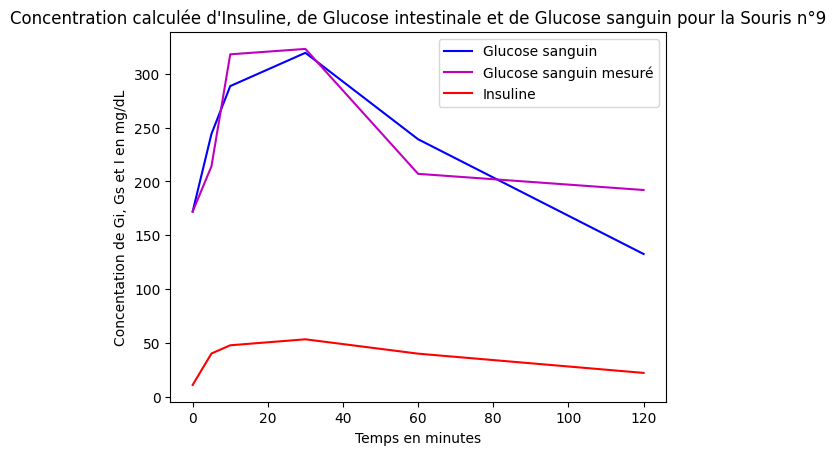

Figure : Souris n° 9 

Optimization terminated successfully.
         Current function value: 8498.829148
         Iterations: 163
         Function evaluations: 284
[1.02923412e-02 1.12205204e-01 1.87954893e-08 7.60751496e-02]


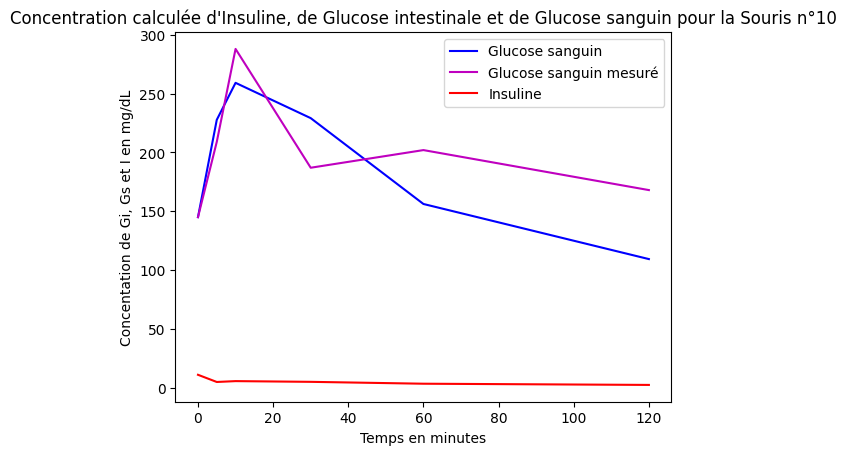

Figure : Souris n° 10 

Optimization terminated successfully.
         Current function value: 14237.325595
         Iterations: 218
         Function evaluations: 379
[2.35337488e-02 2.05838290e-01 1.22750330e-08 3.29324452e+00]


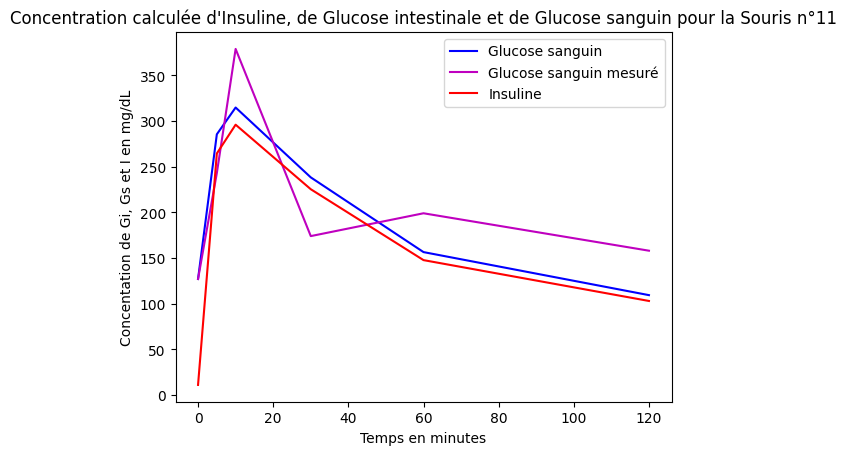

Figure : Souris n° 11 

Optimization terminated successfully.
         Current function value: 6571.521135
         Iterations: 271
         Function evaluations: 589
[1.69388128e-02 1.82526251e-01 9.87552811e-09 5.40321106e-01]


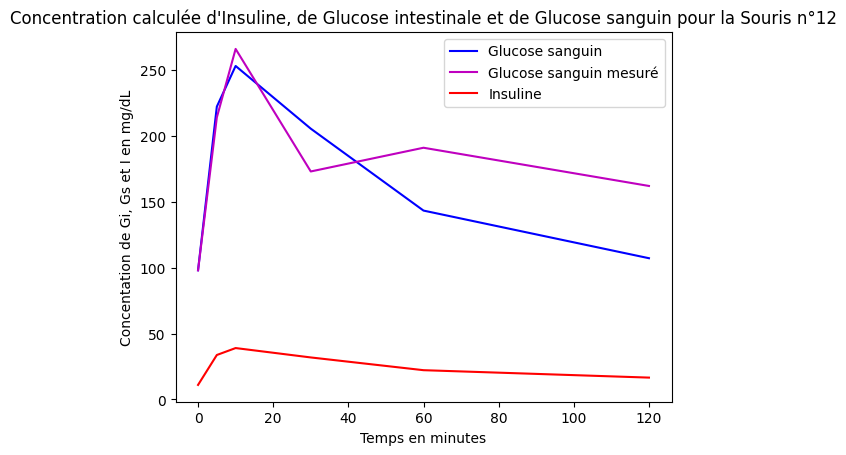

Figure : Souris n° 12 

Optimization terminated successfully.
         Current function value: 9615.836473
         Iterations: 130
         Function evaluations: 237
[1.72840533e-02 1.65833476e-01 3.00024684e-09 3.52349456e-02]


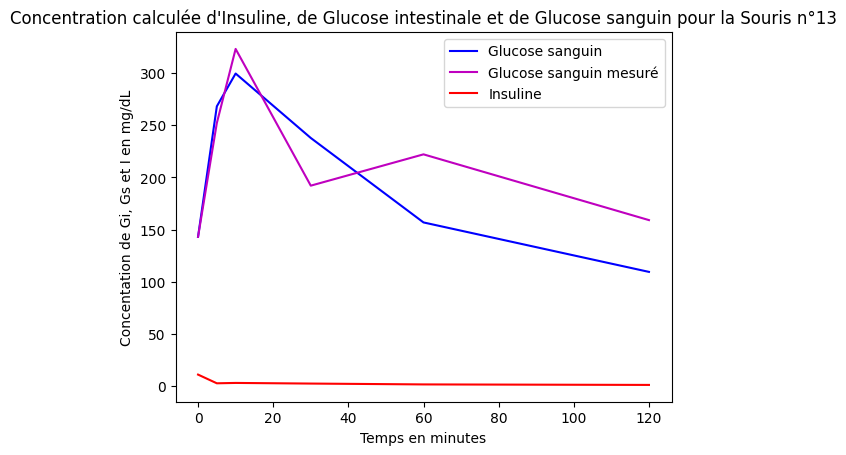

Figure : Souris n° 13 

Optimization terminated successfully.
         Current function value: 5333.882336
         Iterations: 201
         Function evaluations: 387
[8.12780616e-03 5.58652883e-02 2.68340371e-18 2.63276225e-07]


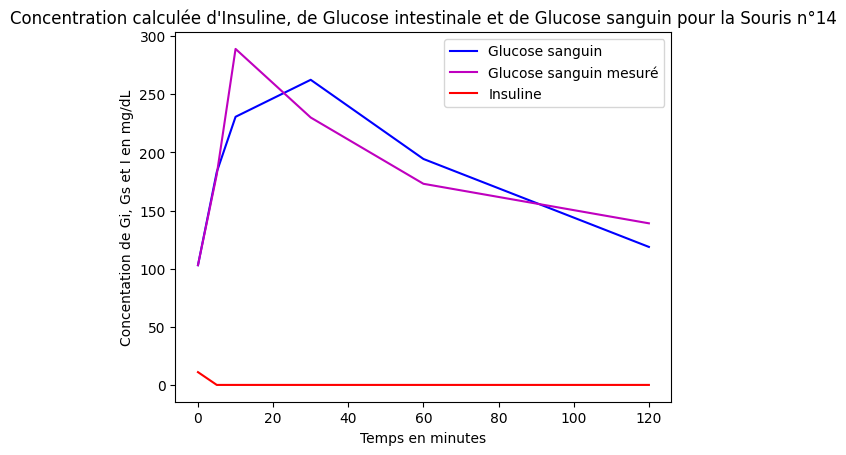

Figure : Souris n° 14 



In [25]:
M_ko = np.zeros((14,4))

for j in range(1,15):
    obs = data_ko[1:,j]
    U0, k, b, c, d, e = 5e-3, 2e-2, 7e-10, 3e-2, 0.7, 3.5
    param = [U0, k, b, d]
    y0 = [2500, obs[0], 11]

    param = fmin(distance, param, args=(y0, t3, obs))
    U0, k, b, d = param
    print(param)
    UGiGsI = odeint(advanced_model, y0, t3, args=(U0, k, b, c, d, e))
    M_ko[j-1] = param

    Gi_estime = UGiGsI[:,0]
    Gs_estime = UGiGsI[:,1]
    I_estime = UGiGsI[:,2]

    plt.title("Concentration calculée d'Insuline, de Glucose intestinale et de Glucose sanguin pour la Souris n°" + str(j))
    plt.xlabel("Temps en minutes")
    plt.ylabel("Concentation de Gi, Gs et I en mg/dL")
    plt.plot(t3, Gs_estime, "b", label="Glucose sanguin")
    plt.plot(t3, obs, "m", label="Glucose sanguin mesuré")
    plt.plot(t3, I_estime, "r", label="Insuline")
    plt.legend(loc="upper right")
    plt.show()
    print("Figure : Souris n°", j, "\n")

Mean_ko = np.mean(M_ko,axis=0)
Std_ko = np.std(M_ko, axis=0)

Les paramètres obtenus ne sont pas forcément pertinent car l'estimation porte sur une courbe de seulement 7 points.

In [142]:
param = ['U0','k','b','d']
P_ct = M_ct[:,0]
P_ct = [P_ct[k] for k in range(15)]
P_ko = M_ko[:,0]
P_ko = [P_ko[k] for k in range(14) if k not in [10]]
print(len(P_ct),len(P_ko))

15 13


À l'oeil nu il ne semble pas y avoir de différence notable entre le groupe des souris KO et le groupe contrôle sauf pour le paramètre U0. On entame donc des tests statistiques afin de valider ou non cette hypothèse. Les deux échantillons sont indépendants.

On souhaite appliquer un test de Student de deux échantillons indépendants pour chaque paramètre.

Pour cela, on vérifie les conditions d'applications de ce test :

In [141]:
df1 = len(P_ct) - 1
df2 = len(P_ko) - 1
F = Std_ct[0] / Std_ko[0]

print(sc.f.cdf(F, df1, df2))
print(param[2])
print('\n')

print("Pour " + param[3])
print(sc.shapiro(P_ct))
print(sc.shapiro(P_ko))
print()
print(sc.ttest_ind(P_ct, P_ko))
print()
print(sc.mannwhitneyu(P_ct,P_ko))
print('\n')


0.8054485294555932
b


Pour d
ShapiroResult(statistic=0.4968969225883484, pvalue=3.344600372656714e-06)
ShapiroResult(statistic=0.47715044021606445, pvalue=3.4423476336087333e-06)

Ttest_indResult(statistic=0.9411879649319024, pvalue=0.35979162455488334)

MannwhitneyuResult(statistic=44.0, pvalue=0.967435545139537)




Les différents tests nous amènent donc à considérer qu'il n'y a aucun impact du KO sur aucun des 4 paramètres. Cela nous semble tout de même assez étrange et au vu de l'énoncé on se serait plutôt attendu à une nette différence entre les deux paramètres b.